In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

In [3]:
import pandas as pd
df = pd.read_csv("aug_train_cleaned_oversampling.csv")

x = df.drop(columns=['enrollee_id','target'])
y = df['target'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [5]:
df.shape

(26282, 34)

In [6]:
xtrain.shape

(18397, 32)

In [7]:
xtest.shape

(7885, 32)

# Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
model = LogisticRegression() # inisiasi object dengan nama logreg
model.fit(xtrain, ytrain) # fit model regression dari data train

LogisticRegression()

In [5]:
y_pred = model.predict(xtest)
y_pred

array([1., 0., 0., ..., 1., 0., 0.])

In [6]:
eval_classification(model, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.71
Recall (Test Set): 0.66
F1-Score (Test Set): 0.68
AUC: 0.69


In [7]:
print('Train score: ' + str(model.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(xtest, ytest))) #accuracy

Train score: 0.6934826330379953
Test score:0.6944831959416614


### Tune Hyperparameter with Random Search

In [16]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
eval_classification(model, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.72
Recall (Test Set): 0.65
F1-Score (Test Set): 0.68
AUC: 0.70


In [14]:
model

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [0.0001, 0.001, 0.002],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   random_state=42, scoring='recall')

In [15]:
model.best_params_

{'penalty': 'l2', 'C': 0.002}

In [13]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.002


In [14]:
print('Train score: ' + str(model.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(xtest, ytest))) #accuracy

Train score: 0.6453507340946166
Test score:0.6507856056766346


# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(xtrain, ytrain) # fit model KNN dari data train

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(xtest)
eval_classification(knn, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.70
Recall (Test Set): 0.81
F1-Score (Test Set): 0.75
AUC: 0.74


In [17]:
print('Train score: ' + str(knn.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(knn.score(xtest, ytest))) #accuracy

Train score: 0.8214382779801055
Test score:0.7351934051997464


### Tune Hyperparameter with Random Search

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fit Model & Evaluasi
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
eval_classification(model, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.70
Recall (Test Set): 0.81
F1-Score (Test Set): 0.75
AUC: 0.74


In [19]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 5
Best p: 2
Best algorithm: auto


In [20]:
print('Train score: ' + str(model.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(xtest, ytest))) #accuracy

Train score: 0.8986405655247417
Test score:0.8117080587937151


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [22]:
y_pred = rf.predict(xtest)
eval_classification(rf, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.83
Recall (Test Set): 0.93
F1-Score (Test Set): 0.88
AUC: 0.87


In [23]:
print('Train score: ' + str(rf.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(rf.score(xtest, ytest))) #accuracy

Train score: 0.9889112355275317
Test score:0.8694990488268864


### Tune Hyperparameter with Random Search

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(xtrain,ytrain)

# Predict & Evaluation
y_pred = rf_tuned.predict(xtest)#Check performa dari model
eval_classification(rf_tuned, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.83
Recall (Test Set): 0.91
F1-Score (Test Set): 0.87
AUC: 0.86


In [25]:
print('Train score: ' + str(rf_tuned.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(rf_tuned.score(xtest, ytest))) #accuracy

Train score: 0.9848830886351277
Test score:0.9133299543841865


In [26]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [27]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


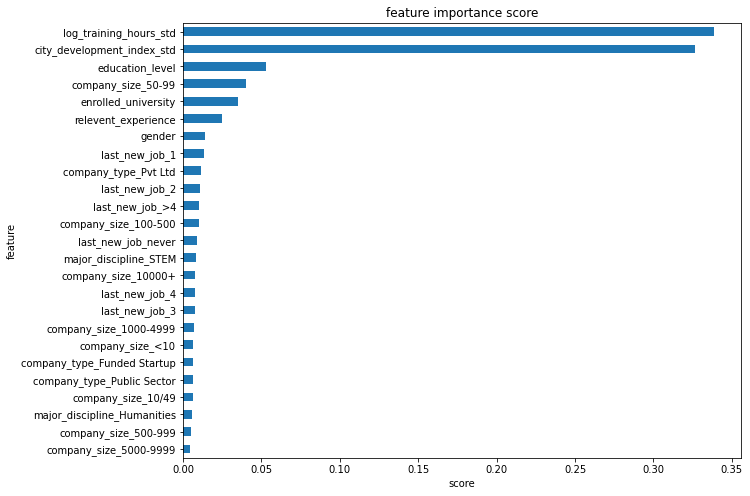

In [28]:
show_feature_importance(rf_tuned.best_estimator_)

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain,ytrain)

y_pred = dt.predict(xtest)
eval_classification(dt, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.79
Recall (Test Set): 0.92
F1-Score (Test Set): 0.85
AUC: 0.84


In [30]:
print('Train score: ' + str(dt.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(dt.score(xtest, ytest))) #accuracy

Train score: 0.9889112355275317
Test score:0.8383005707038681


### Tune Hyperparameter with Random Search

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(xtrain, ytrain)

# Predict & Evaluation
y_pred = model.predict(xtest)#Check performa dari model
eval_classification(model, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.76
Recall (Test Set): 0.80
F1-Score (Test Set): 0.78
AUC: 0.78


In [32]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [33]:
print('Train score: ' + str(model.score(xtrain, ytrain)))
print('Test score:' + str(model.score(xtest, ytest)))

Train score: 0.8972267536704731
Test score:0.8038520020273695


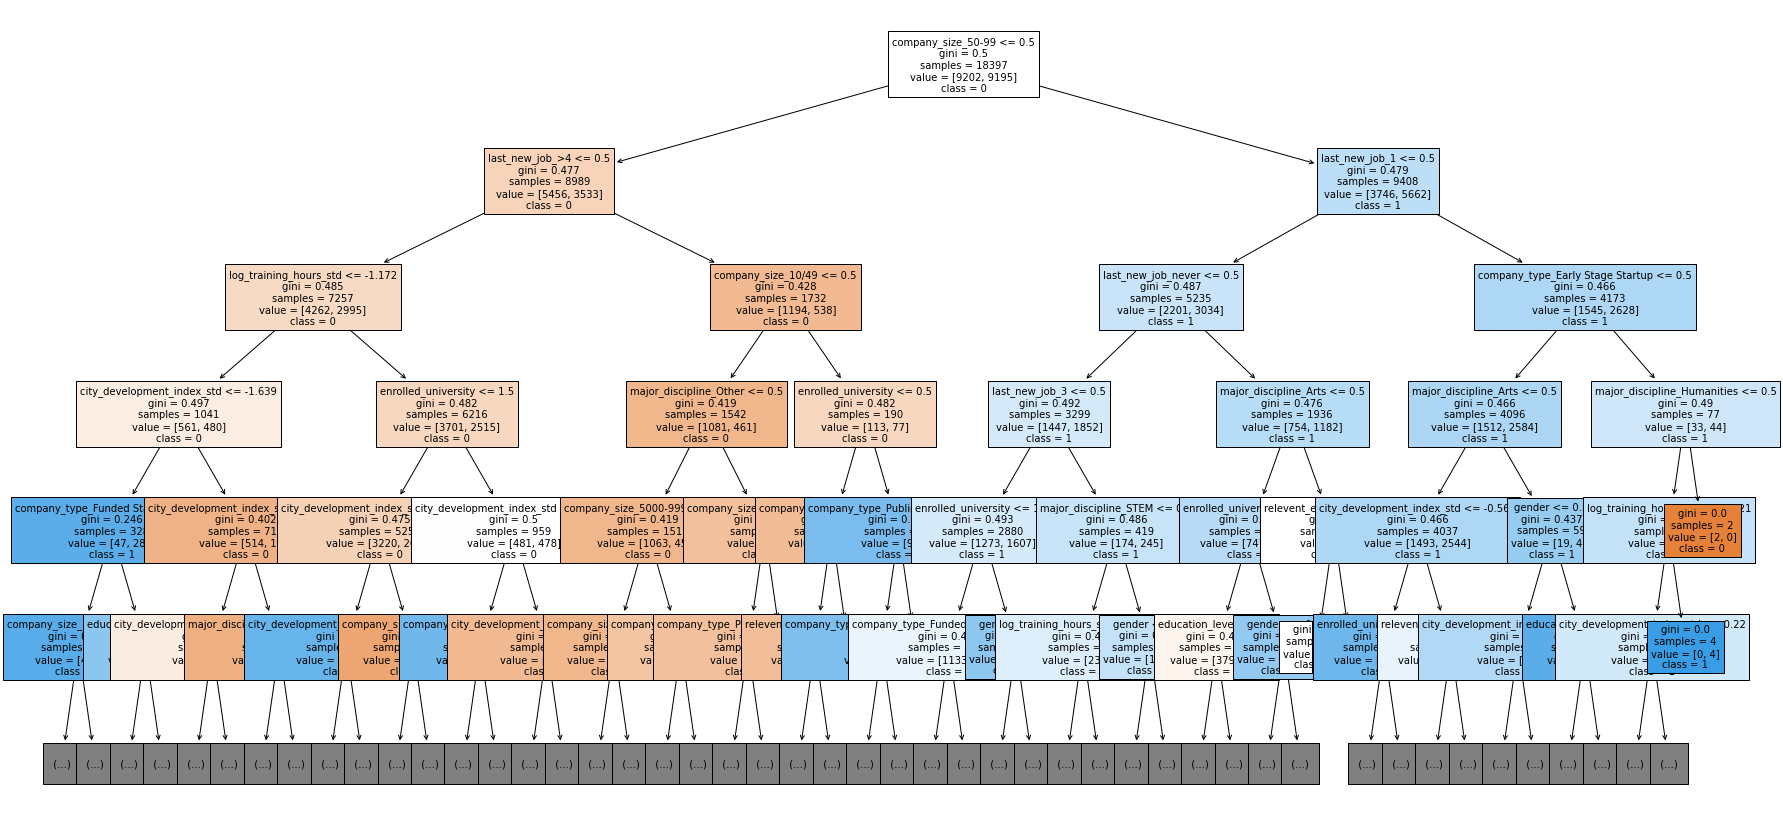

In [34]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30, 15))
tree.plot_tree(model.best_estimator_,
               feature_names = x.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

# SVM

In [35]:
import cvxopt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [36]:
from sklearn import svm
#Create a svm Classifier
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(xtrain, ytrain)

#Predict the response for test dataset
y_pred = svclassifier.predict(xtest)
eval_classification(svclassifier, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.72
Recall (Test Set): 0.57
F1-Score (Test Set): 0.64
AUC: 0.67


In [37]:
print('Train score: ' + str(svclassifier.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(svclassifier.score(xtest, ytest))) #accuracy

Train score: 0.6765233461977497
Test score:0.6746987951807228


### Tune Hyperparameter with Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=  26.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.730 total time=  24.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=  22.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time=  22.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=  21.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=  19.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=  20.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=  19.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=  19.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=  19.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.672 total time=  20.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.790 total time= 3.3min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.797 total time= 3.1min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.794 total time= 2.7min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.788 total time= 3.3min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.766 total time= 3.5min
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.750 total time= 3.5min
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.749 total time= 3.5min
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.748 total time= 3.4min
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.758 total time= 3.4min
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.732 total time=  44.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.722 total time=  45.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.725 total time=  45.6s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [39]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1)


In [40]:
grid_predictions = grid.predict(xtest)
 
# print classification report
print(eval_classification(svclassifier, grid_predictions, xtrain, ytrain, xtest, ytest))

Accuracy (Test Set): 0.82
Precision (Test Set): 0.78
Recall (Test Set): 0.88
F1-Score (Test Set): 0.83
AUC: 0.82
None


In [48]:
print('Train score: ' + str(svclassifier.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(svclassifier.score(xtest, ytest))) #accuracy

Train score: 0.6765233461977497
Test score:0.6746987951807228


# XGBoost

In [45]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

xtrain.columns = [regex.sub('_', col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in xtrain.columns.values]

In [46]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain)

y_pred = xg.predict(xtest)
eval_classification(xg, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.78
Recall (Test Set): 0.82
F1-Score (Test Set): 0.80
AUC: 0.79


In [47]:
print('Train score: ' + str(xg.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(xg.score(xtest, ytest))) #accuracy

Train score: 0.8400826221666576
Test score:0.7936588459099556


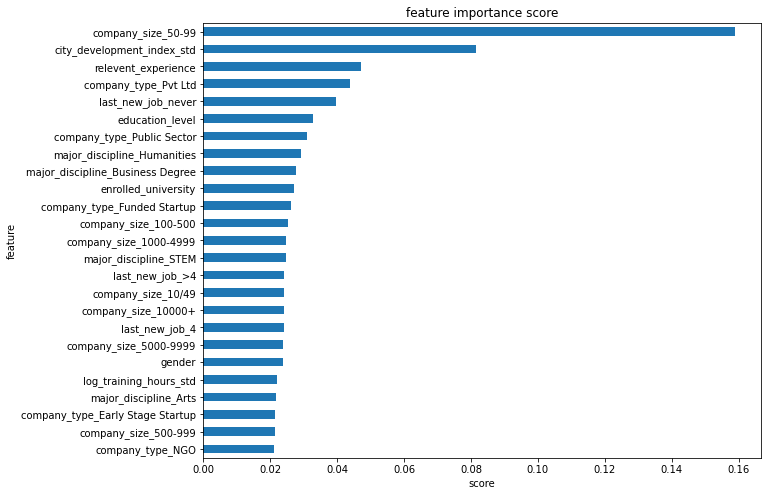

In [48]:
show_feature_importance(xg)

### Tune Hyperparameter with Random Search

In [49]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(xtrain,ytrain)

# Predict & Evaluation
y_pred = xg_tuned.predict(xtest)#Check performa dari model
eval_classification(xg_tuned, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.80
Recall (Test Set): 0.89
F1-Score (Test Set): 0.84
AUC: 0.83


In [50]:
print('Train score: ' + str(xg_tuned.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(xg_tuned.score(xtest, ytest))) #accuracy

Train score: 0.9691136487221316
Test score:0.8874809934110491


In [51]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 110
Best min_child_weight: 2
Best gamma: 0.5
Best tree_method: hist
Best colsample_bytree: 1.0
Best eta: 0.7777777777777778
Best lambda: 0.2
Best alpha: 0.1


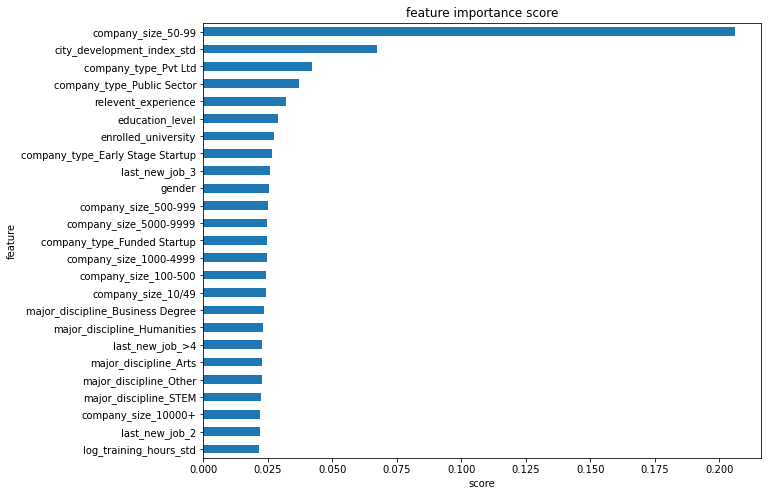

In [52]:
show_feature_importance(xg_tuned.best_estimator_)

# AdaBoost

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(xtrain,ytrain)

y_pred = ab.predict(xtest)
eval_classification(ab, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.75
Recall (Test Set): 0.73
F1-Score (Test Set): 0.74
AUC: 0.75


In [54]:
print('Train score: ' + str(ab.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(ab.score(xtest, ytest))) #accuracy

Train score: 0.7421318693265206
Test score:0.7471147748890298


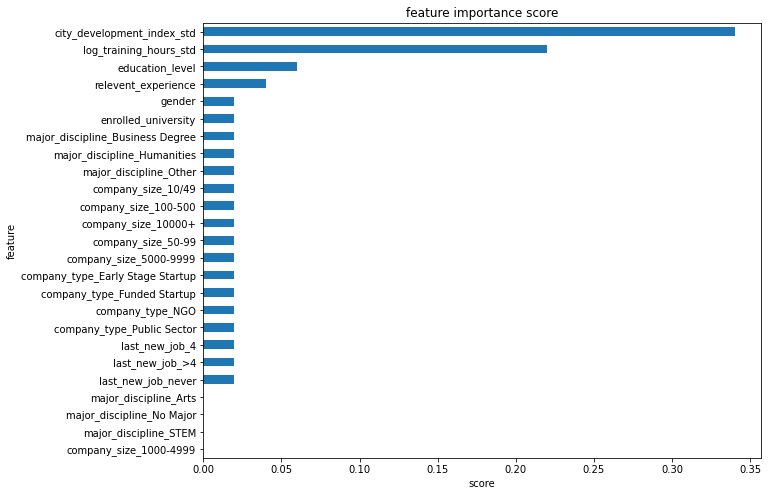

In [55]:
show_feature_importance(ab)

### Hyperparameter Tuning Adaboost

In [56]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(xtrain,ytrain)

# Predict & Evaluation
y_pred = ab_tuned.predict(xtest)#Check performa dari model
eval_classification(ab_tuned, y_pred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.76
Recall (Test Set): 0.73
F1-Score (Test Set): 0.74
AUC: 0.75


In [57]:
print('Train score: ' + str(ab_tuned.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(ab_tuned.score(xtest, ytest))) #accuracy

Train score: 0.7288743882544861
Test score:0.7336543335022808


In [58]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1700
Best learning_rate: 0.07394736842105264
Best algorithm: SAMME.R


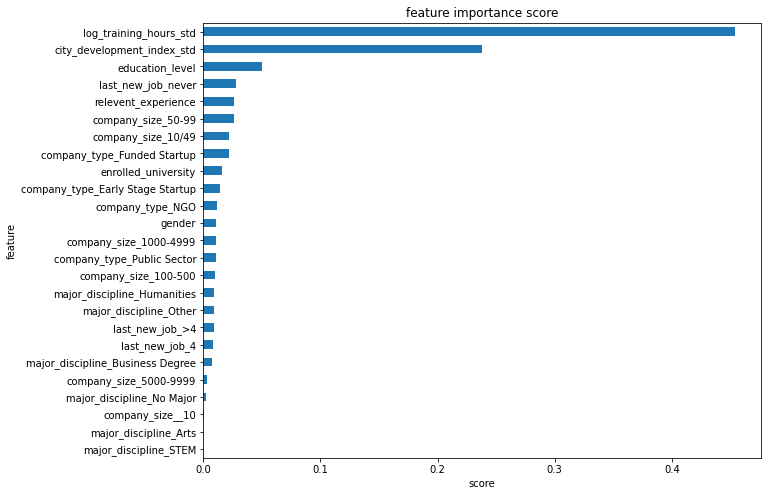

In [59]:
show_feature_importance(ab_tuned.best_estimator_)